# Statistical Pattern Recognition - Solution 4: Nonparametric methods

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## $\star$ Part 1: K-nearest neighbors

Load the data from dataset.npz and split it evenly into a training set
and a test set. 

Each sample consists of a point in 2D and a class label
$\{1,2,3\}$.

For each point in the test set, predict its label by a k-nearest
neighbor classifier “trained” using the training set. 

Compute the **average classification error** using the true labels of the test set. 

Visualize the training and test points with their respective label, as well as the classifier's decision boundary using a **contour plot** (see example at the bottom).

Repeat for different values of k.


In [20]:

# load the data and split it into train and test sets
# START TODO ################
data = np.load('../data/dataset.npz')["arr_0"]
# setting random_state allows us to get the same 
# "random" split everytime we split the data
data_train, data_test = train_test_split(
    data, test_size=0.5, random_state=42)
# END TODO ################

# check that the data and the split shapes are correct
# START TODO ################
# here we check whether the data is equally split 
# between test and train sets
print(np.shape(data))
print(np.shape(data_train))
print(np.shape(data_test))

# here we check how our data looks like
print("\nExample datapoint (x, y, class)")
print(data_train[0])
# END TODO ################

(280, 3)
(140, 3)
(140, 3)

Example datapoint (x, y, class)
[4.23348774 4.32594983 2.        ]


Classification error (%): 16.429%


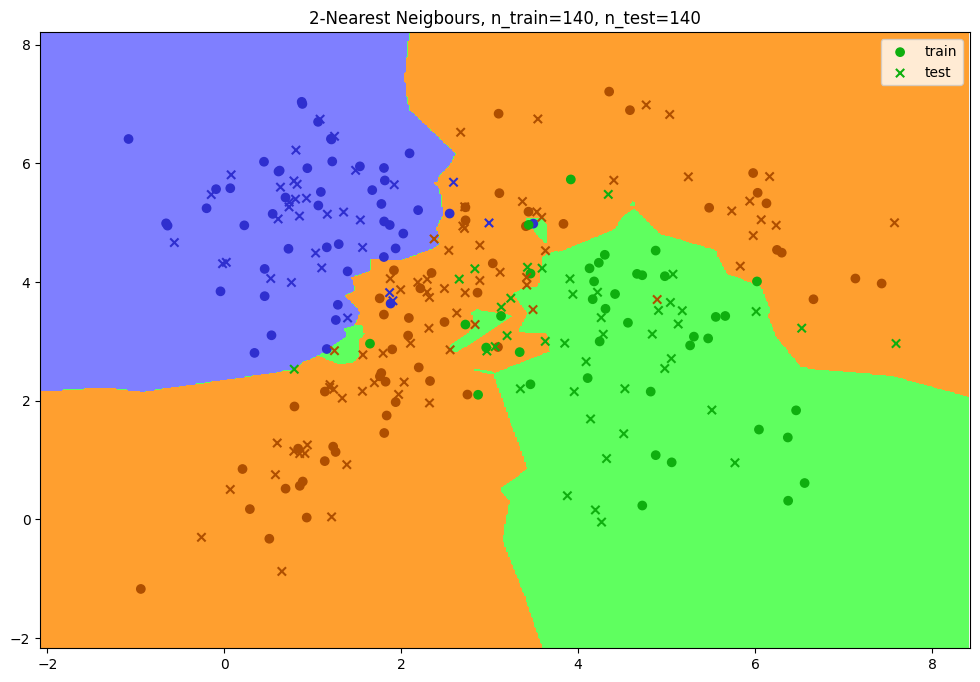

In [21]:
# train and plot the k-nearest neighbors classifier
def plot_k_neighbors(k, data_train, data_test, classifier=KNeighborsClassifier):
    """
    k: Number of neighbors to use
    data_train: subsection of the dataset that is to be used for training
    data_test subsection of the dataset that is to be used for testing

    For more information on the KNeighborsClassifier see:
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    """
    # START TODO ################
    inputs_train = data_train[:, 0:2]
    x_train = inputs_train[:, 0]
    y_train = inputs_train[:, 1]
    labels_train = data_train[:, 2]
    
    inputs_test = data_test[:, 0:2]
    x_test = inputs_test[:, 0]
    y_test = inputs_test[:, 1]
    labels_test = data_test[:, 2]
    
    # create model and fit data
    neigh = classifier(n_neighbors=k)
    out = neigh.fit(inputs_train, labels_train)
    preds_train = neigh.predict(inputs_train)
    
    # predict the labels of the test set and compute accuracy
    preds_test = neigh.predict(inputs_test)
    accuracy_test = metrics.accuracy_score(labels_test, preds_test)
    print(f"Classification error (%): {1 - accuracy_test:.3%}")
    
    # calculate boundaries for the plot
    border = 1
    x_min, x_max = x_train.min() - border, x_train.max() + border
    y_min, y_max = y_train.min() - border, y_train.max() + border
    
    # create meshgrid
    grid_size = .02
    xrange = np.arange(x_min, x_max, grid_size)  # (width)
    yrange = np.arange(y_min, y_max, grid_size)  # (height)
    xx, yy = np.meshgrid(xrange, yrange)  # both (height, width)
    
    # reshape meshgrid points for input to predictor
    # predict function expects shape (n_datapoints, features)
    # we are given two grids of shape (height, width) with one feature each
    # so we flatten and stack them to (height * width, features)
    xx_flat = xx.reshape(-1)
    yy_flat = yy.reshape(-1)
    grid_inputs = np.stack([xx_flat, yy_flat], axis=-1)
    
    # predict labels for each point in the grid
    # and reshape result to grid dimensions
    zz = neigh.predict(grid_inputs)  # (height * width)
    zz = zz.reshape(xx.shape)  # (height, width)
    
    # create color maps for visualizing datapoints and classes
    cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
    cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

    # plot the contour
    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, zz, cmap=cmap_light)

    # plot the training data points
    plt.scatter(x_train, y_train, c=labels_train,
                cmap=cmap_bold, marker="o",
                label="train")
    
    # plot the test data points
    plt.scatter(x_test, y_test, c=labels_test,
                cmap=cmap_bold, marker="x",
                label="test")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f"{k}-Nearest Neigbours, n_train={len(data_train)}, "
              f"n_test={len(data_test)}")
    plt.legend()
    
    plt.show()
    # END TODO ################
    
plot_k_neighbors(2, data_train, data_test)


Classification error (%): 16.429%


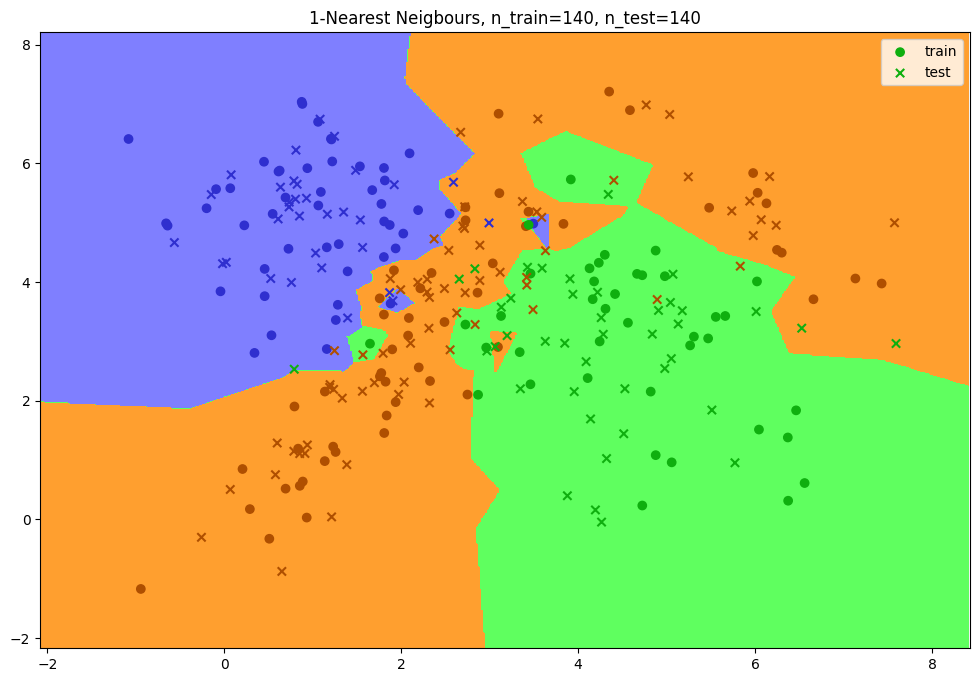

Classification error (%): 16.429%


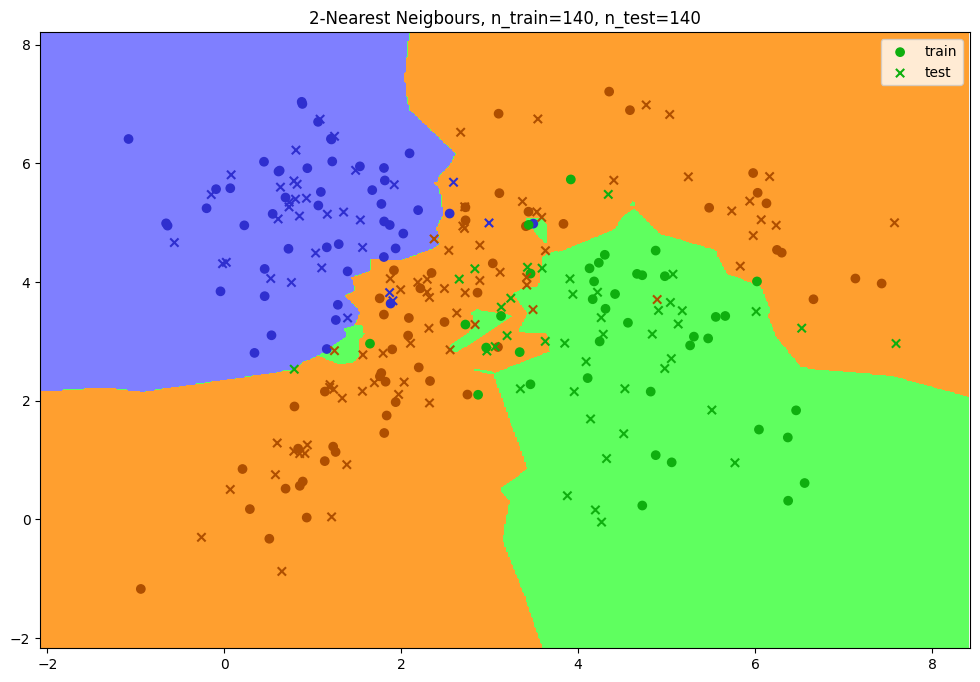

Classification error (%): 12.857%


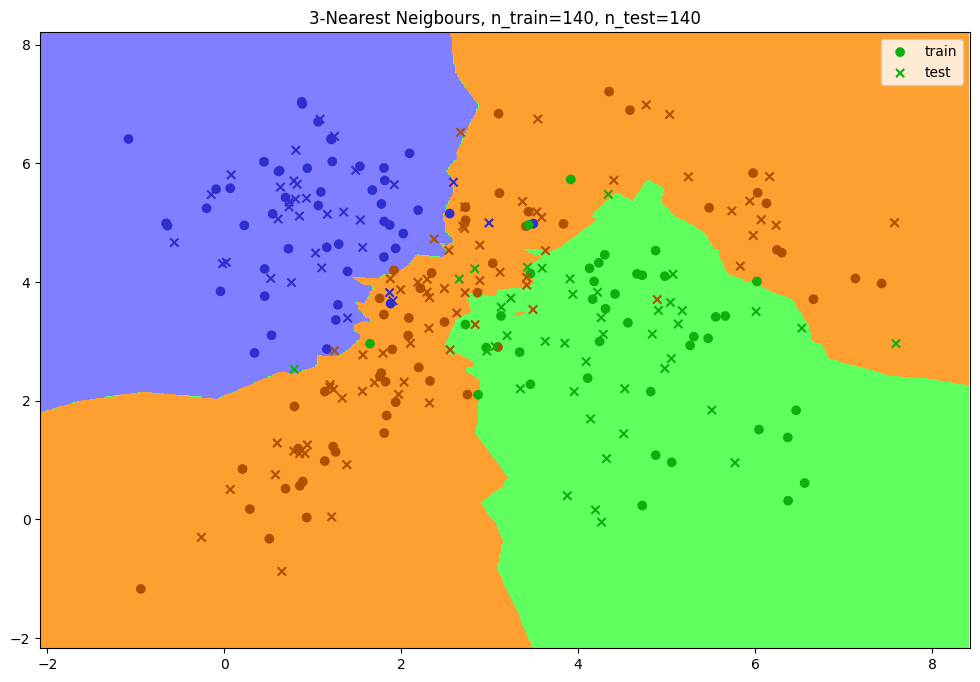

Classification error (%): 12.857%


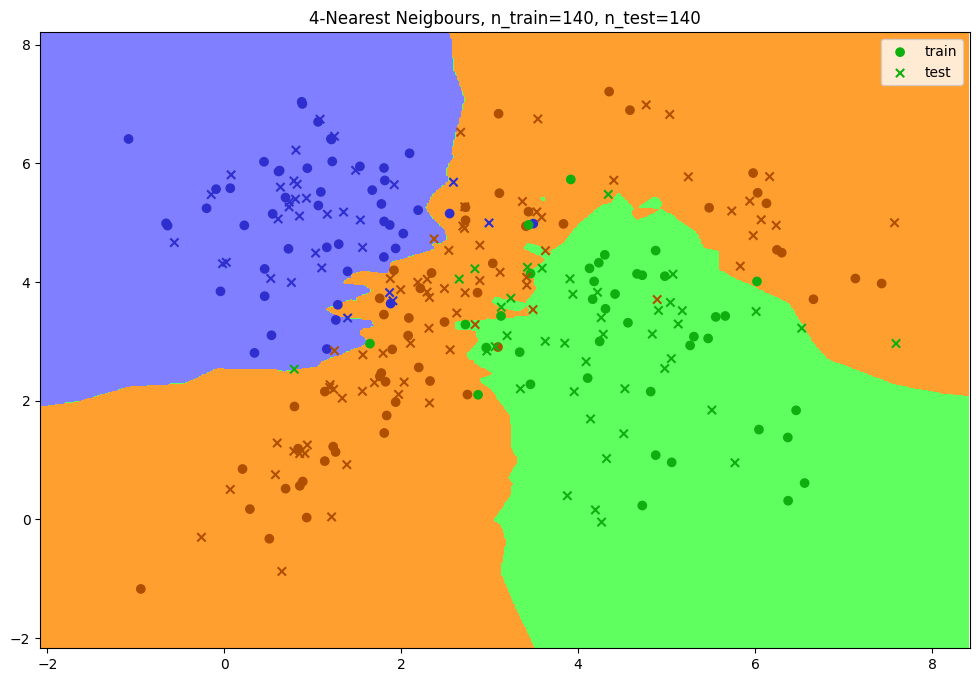

Classification error (%): 14.286%


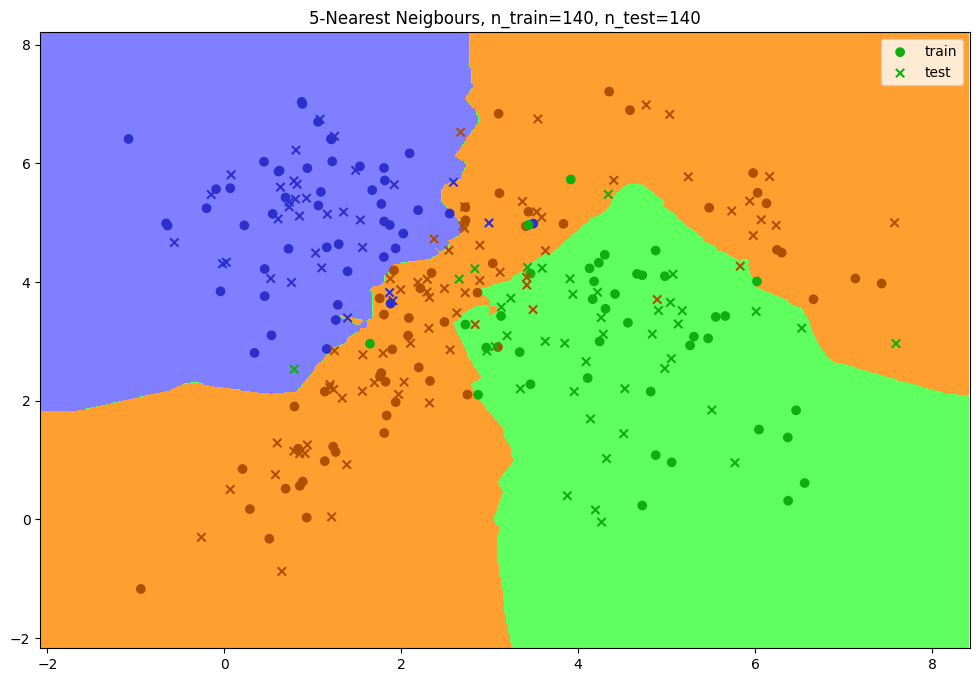

Classification error (%): 12.857%


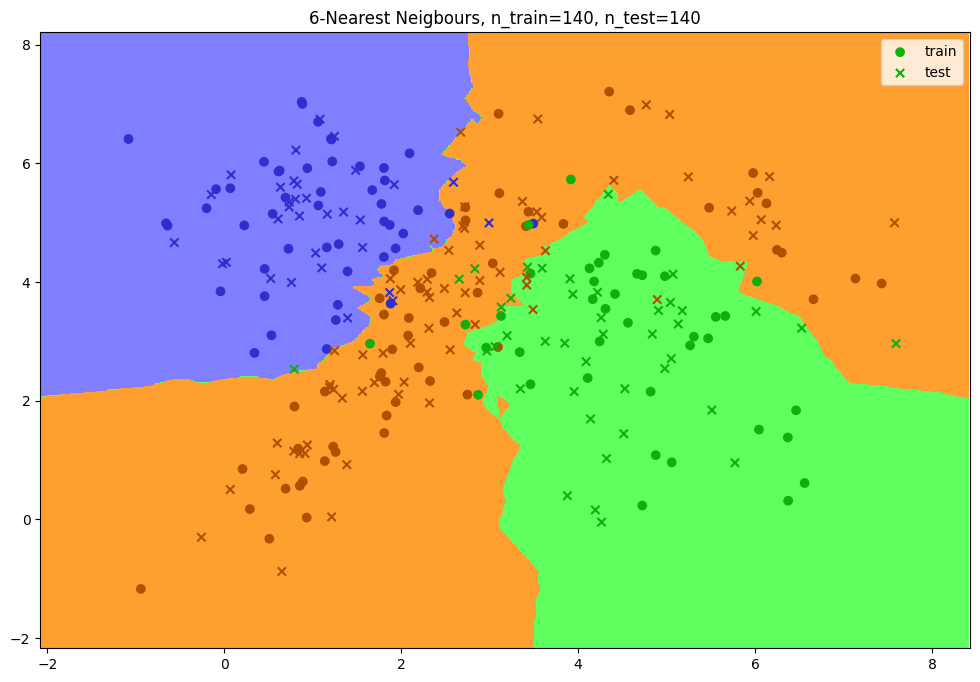

Classification error (%): 12.143%


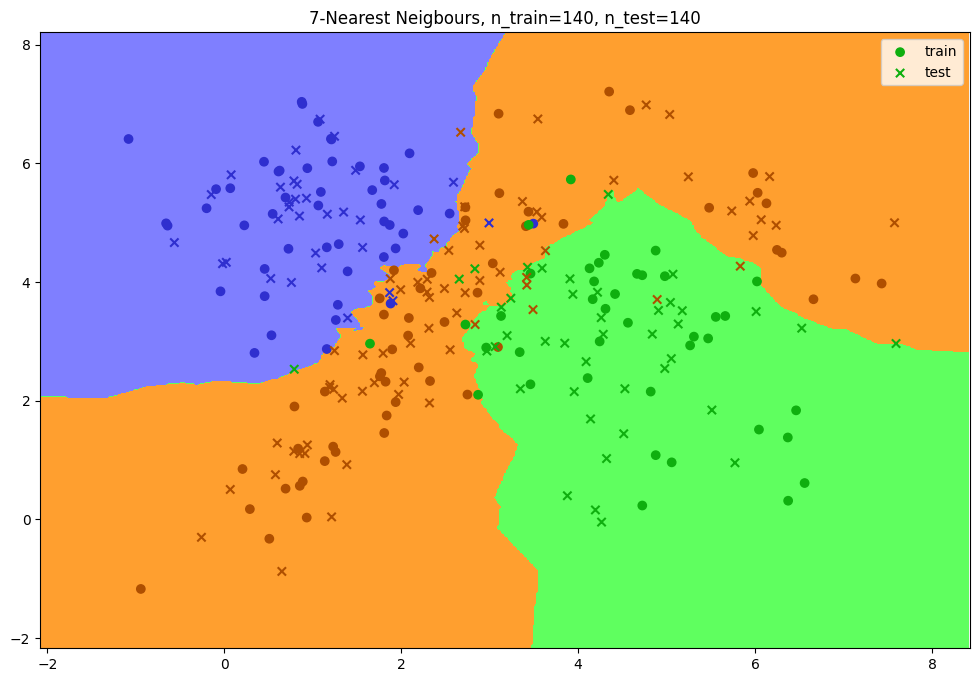

In [22]:
# test for different values of K
for k in range(1, 8):
    plot_k_neighbors(k, data_train, data_test)
    plt.show()

## $\star$ Part 2: Data splits and hyperparameters

Study how different dataset splits and values of k affect classification results.

### Part 2.1
Train and display k-nearest-neighbor models for different *equally sized* splits of the set into training and test set. Use fixed k=4.

Is the classification error always the same?

Classification error (%): 12.857%


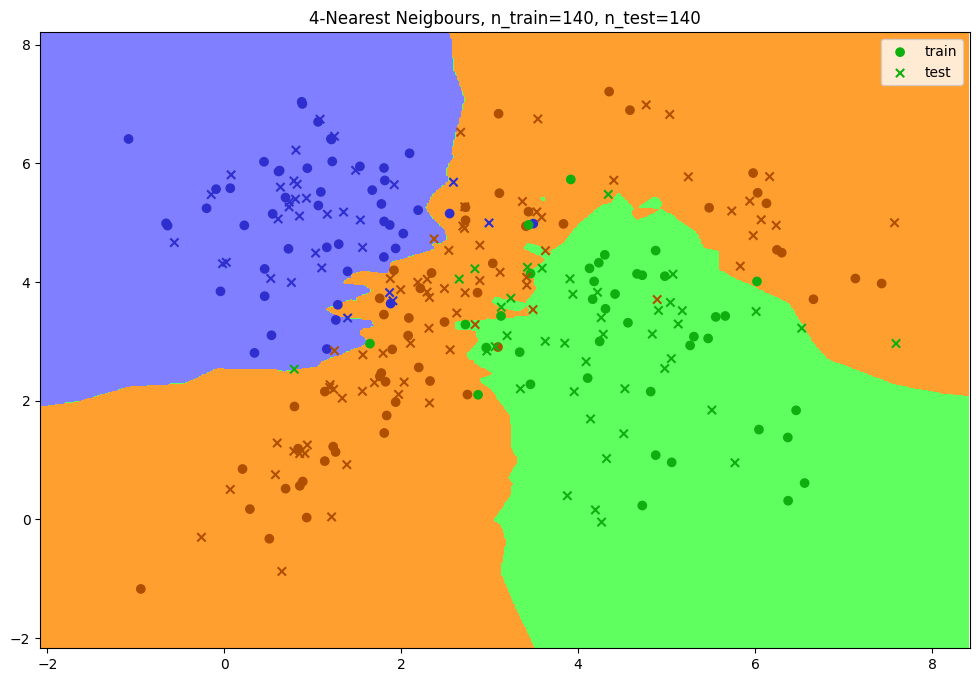

Classification error (%): 14.286%


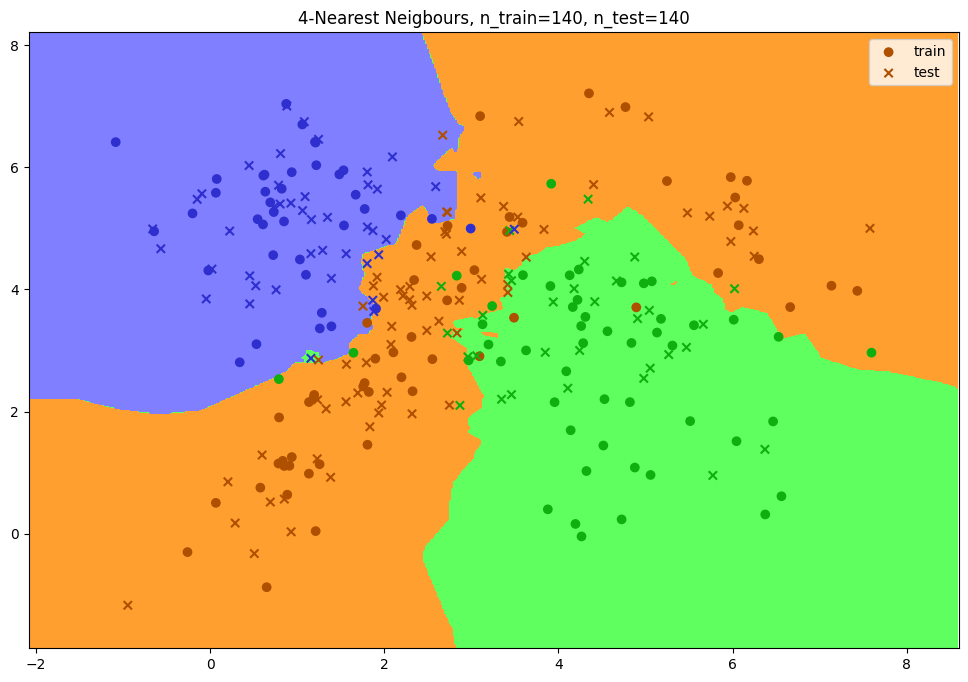

Classification error (%): 17.143%


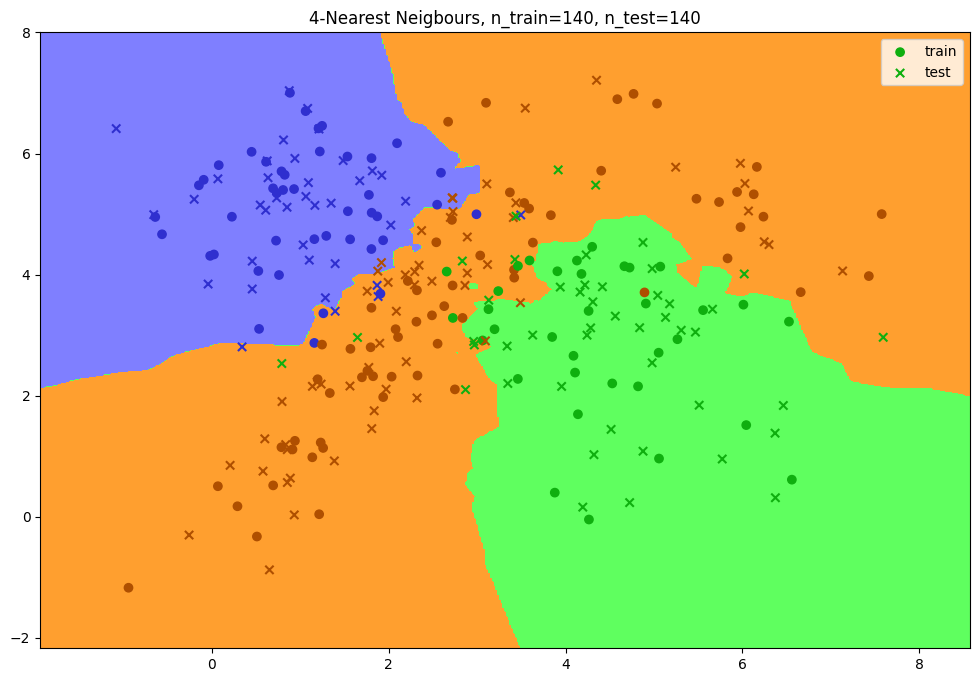

Classification error (%): 13.571%


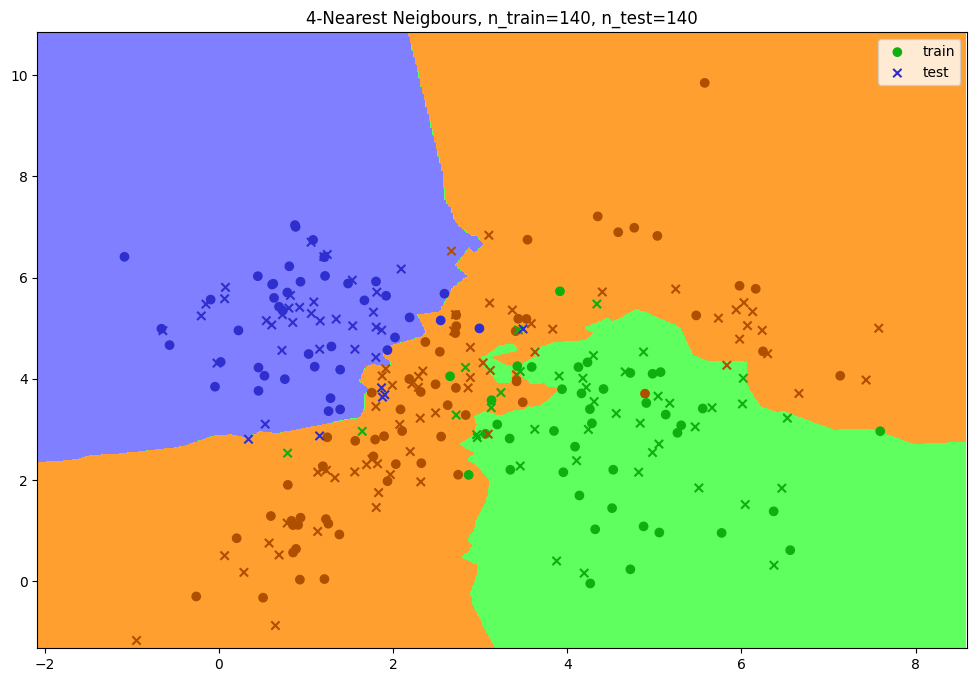

In [9]:
# fix K=4 and check how different random data splits change the result
# START TODO ################
k = 4
# we will split the data 3 times and plot the results
for i in range(3):
    test_size = 0.5
    data_train, data_test = train_test_split(data, test_size=test_size, random_state=42+i)
    plot_k_neighbors(k, data_train, data_test)
    plt.show()
# END TODO ################

### Part 2.2
Train and display k-nearest-neighbor models for differently sized train/test splits. Use fixed k=4.

How does the classification error change?

In [ ]:
# fix K=4 and check how different training set sizes change the result
# START TODO ################
k = 4
# we use the same random_state for all splits, but we will change the test_size
for test_size in [0.8, 0.6, 0.4, 0.2]:
    data_train, data_test = train_test_split(data, test_size=test_size, random_state=42)
    plot_k_neighbors(k, data_train, data_test)
    plt.show()
# END TODO ################

### Part 2.3
Compute and plot the classification error for different values of k, averaged over multiple *equally sized* splits.

How is the mean error affected by k?

What you should observe is an effect illustrating the so-called bias-variance tradeoff and will be discussed in more detail in the next class.

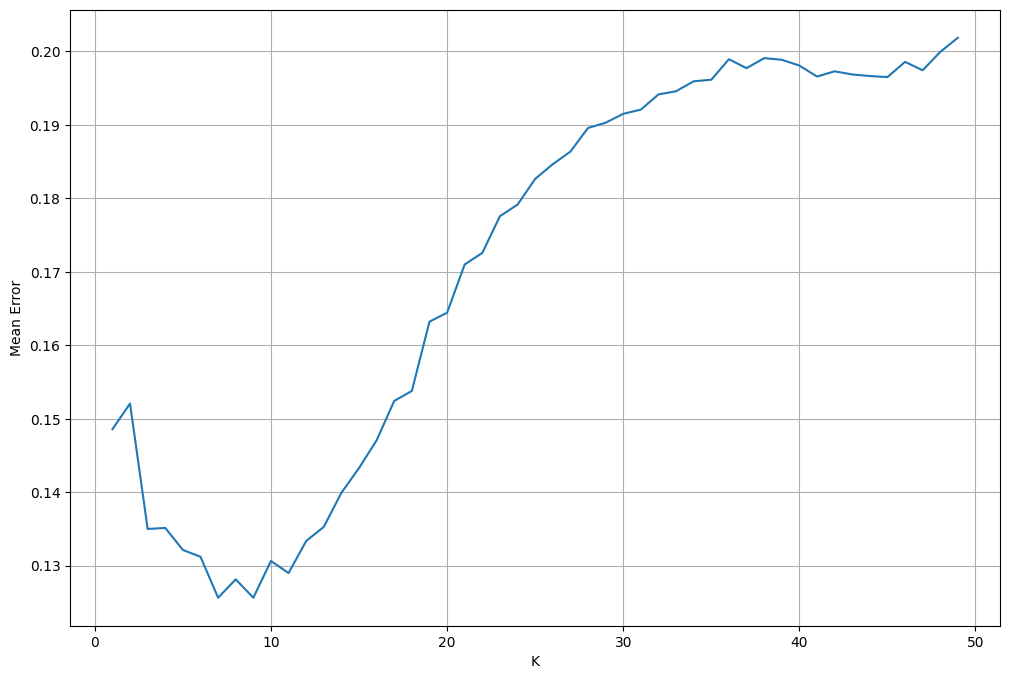

In [13]:
def get_classification_errors(data, k, n_trials):
    '''
    Run n_trials experiments with different (equally sized) train-test splits.
    Return a list of classification errors for each run.
    '''
    errors = []
    # START TODO ################
    for n in range(n_trials):
        data_train, data_test = train_test_split(
            data, test_size=0.5, random_state=42 + n)
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(data_train[:, 0:2], data_train[:, 2])
        preds_test = neigh.predict(data_test[:, 0:2])
        errors.append(1 - metrics.accuracy_score(
            data_test[:, 2], preds_test))
    # END TODO ################
    return errors

ks = range(1, 50)
n_trials = 100
errors = []

# compute the mean classification error for each value of K and plot it as a function of K
# START TODO ################
for k in ks:
    errors.append(get_classification_errors(data, k, n_trials))
errors = np.array(errors)
errors.shape
mean_error = np.mean(errors, axis=1)

plt.figure(figsize=(12,8))
plt.plot(ks, mean_error)
plt.xlabel("K")
plt.ylabel("Mean Error")
plt.grid()
plt.show()
# END TODO ################

## $\star\star\star$ Bonus part: Custom KNN estimator

Implement the same functionality as `KNeighborsClassifier`.

For this, you can create a new class `SimpleKNeighborsClassifier` and implement the methods `__init__`, `fit` and `predict`.

The general idea is to:

* Convert the class labels from {1, 2, 3} to {0, 1, 2}
* Convert the integer classes to [onehot vectors](https://en.wikipedia.org/wiki/One-hot#Machine_learning_and_statistics).
* Compute the distance from all test points to all training points.
* For each test point, sort the training points by ascending distance, only keep the top k datapoints, average the class probabilities of those k points and predict the class with the highest probability.
* Convert the classes back from {0, 1, 2} to {1, 2, 3}

Check if your estimator produces the same results as the estimator from `sklearn`.


### One-hot utility function

In [11]:
def get_onehot_matrix(targets:np.ndarray, num_classes:int):
    # START TODO ################
    # targets shape (n_datapoints)
    # we want a matrix of shape (n_datapoints, num_classes) s. t.
    # entry[n, cls] = 1 if targets[n] == cls else 0
    
    identity_matrix = np.eye(num_classes)  
    # shape (num_classes, num_classes)
    
    # for a datapoint n with class cls, select the row with number cls
    # to get the corresponding onehot vector
    # only integers can be used for indexing, so convert the labels
    res = identity_matrix[targets.astype(np.int64)]
    # shape (n_datapoints, num_classes)
    
    return res
    # END TODO ################

# test the onehot function with mockup targets
example_targets = np.array([1.,3.,0.])
num_classes = 5
example_onehot = get_onehot_matrix(
    example_targets, num_classes)

print(f"Given targets {example_targets} and {num_classes} classes,"
      "\nresulting onehot matrix is:\n"
      f"{example_onehot}")

Given targets [1. 3. 0.] and 5 classes,
resulting onehot matrix is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


*Solution:*

For each test datapoint $\mathbf{x}$ we find the $K$ nearest neighbors using Euclidean (squared) distance.

The Bayesian posterior probability of class $C_i$ is then given by:

$p(C_i | \mathbf{x}) = \dfrac{K_i}{K}$ where $K_i$ is the number of neighbors with class $C_i$.


In [11]:
class SimpleKNeighborsClassifier:
    # START TODO ################

    def __init__(self, n_neighbors:int):
        self.k = n_neighbors

    def fit(self, data:np.ndarray, labels:np.ndarray):
        # simplest implementation just remembers all training data
        self.train_data = data
        assert len(self.train_data) >= k, (
            f"Need at least {k} training examples.")
        
        self.train_labels = labels 
        
        # also we want the classes to range from 0 to num_classes - 1
        # we use min and max to normalize and to determine the number of classes
        self.min_class = np.min(labels)
        self.train_labels = labels - self.min_class
        self.num_classes = int(np.max(self.train_labels) + 1)
                
        # now we can convert the labels to a onehot matrix
        self.train_labels_onehot = get_onehot_matrix(
            self.train_labels, self.num_classes)

    def predict(self, data:np.ndarray):
        # data shape (n_test_datapoints, d_features)
        # train data shape (n_train_datapoints, d_features)
        # train onehot labels shape (n_train_datapoints, n_classes)

        # get the squared distance between all train and test datapoints
        expanded_test_data = data[:, None, :]  # shape (n_test_datapoints, 1, d_features)
        expanded_train_data = self.train_data[None, :, :]  # shape (1, n_train_datapoints, d_features)
        squared_dists = (expanded_test_data - expanded_train_data) ** 2
        # shape (n_test_datapoints, n_train_datapoints, d_features)
        
        # average over last axis (-1)
        mean_dists = squared_dists.mean(axis=-1)
        # shape (n_test_datapoints, n_train_datapoints)
        
        # for each test datapoint,
        # sort the training datapoints by ascending distance
        sort_idx = np.argsort(mean_dists, axis=-1)

        # only keep the top k datapoints
        sort_idx = sort_idx[:, :self.k]
        # now we have for each test datapoint the index of the k closest
        # training datapoints.
        # shape (n_test_datapoints, k)
        
        # now we select the classes of those training datapoints
        # recall onehot labels shape: (n_train_datapoints, n_classes)
        neighbor_classes = self.train_labels_onehot[sort_idx]
        # shape (n_test_datapoint, k, n_classes)
        
        # since we have onehot vectors, we can average over the
        # neighbors to get the bayesian posterior
        probs = neighbor_classes.mean(axis=1)
        # shape (n_test_datapoints, n_classes)
        
        # finally we choose the class with the highest probability
        preds = probs.argmax(axis=-1)
        
        # now we undo the normalization
        preds = preds + self.min_class
        
        return preds
    # END TODO ################


---------- Custom implementation:
Classification error (%): 10.714%


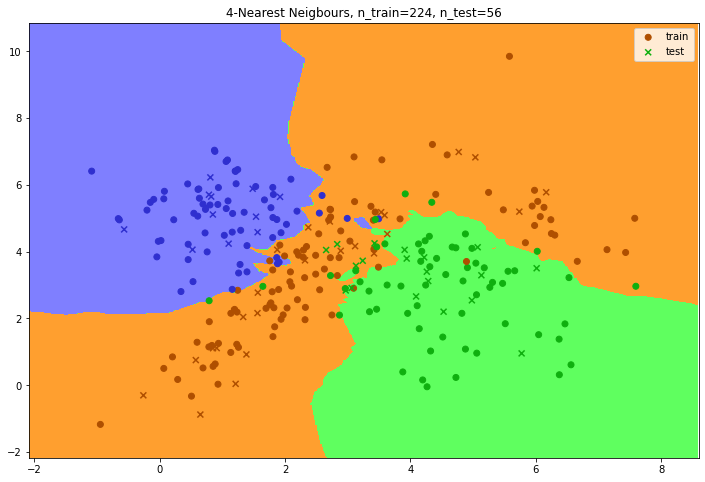


---------- Implementation from sklearn:
Classification error (%): 10.714%


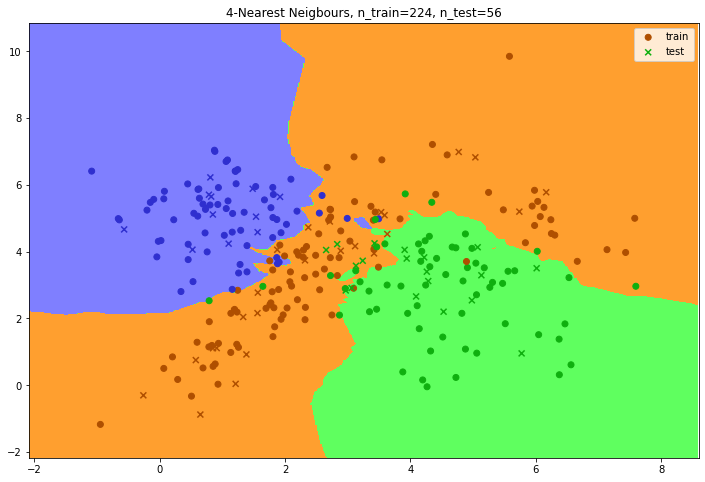

In [13]:
print("---------- Custom implementation:")
plot_k_neighbors(4, data_train, data_test, 
                 classifier=SimpleKNeighborsClassifier)
print()
print("---------- Implementation from sklearn:")
plot_k_neighbors(4, data_train, data_test, 
                 classifier=KNeighborsClassifier)

## Hints

### Example output for Part 1

![example output](ex4_example_output.jpg)


### Creating contour plots

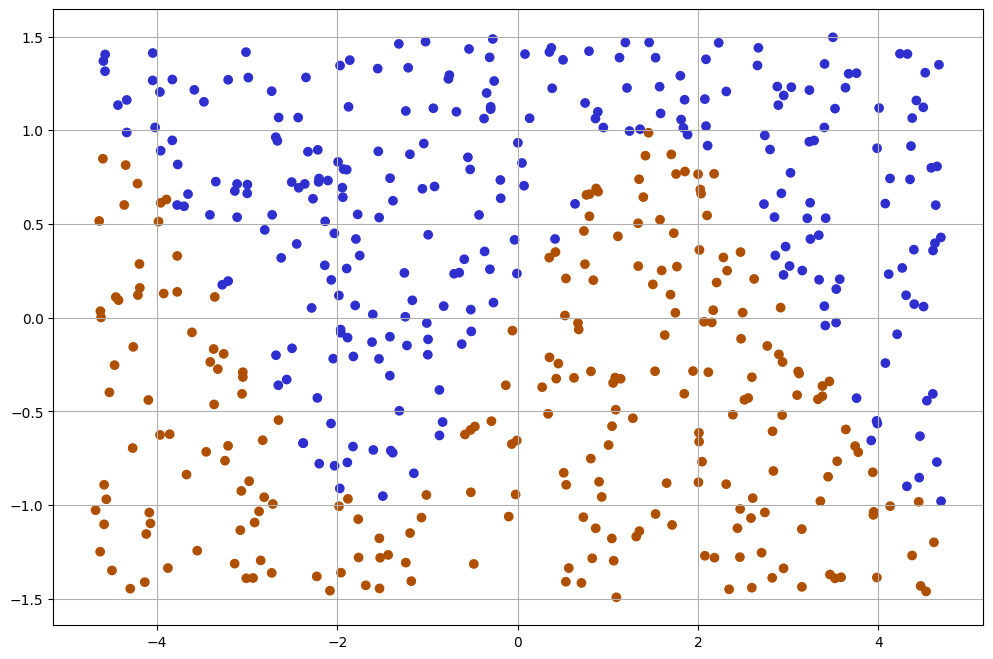

In [17]:
### Creating contour plots

# create custom colormaps
cmap_light = ListedColormap(['#ff9f2f', '#5fff5f', '#7f7fff'])
cmap_bold = ListedColormap(['#af4f00', '#0faf0f', '#2f2fcf'])

# create some example data in sine form
data = np.random.uniform(-1.5, 1.5, size=(500,2))
data[:, 0] *= 3.14
x, y = data[:, 0], data[:, 1]

# set data classes with sine as border
y_border = np.sin(data[:, 0])
classes = (y > y_border).astype(float)

# plot points colored by classes with the created colormap
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()

xrange.shape=(479,), yrange.shape=(160,)
xx.shape=(160, 479), yy.shape=(160, 479)


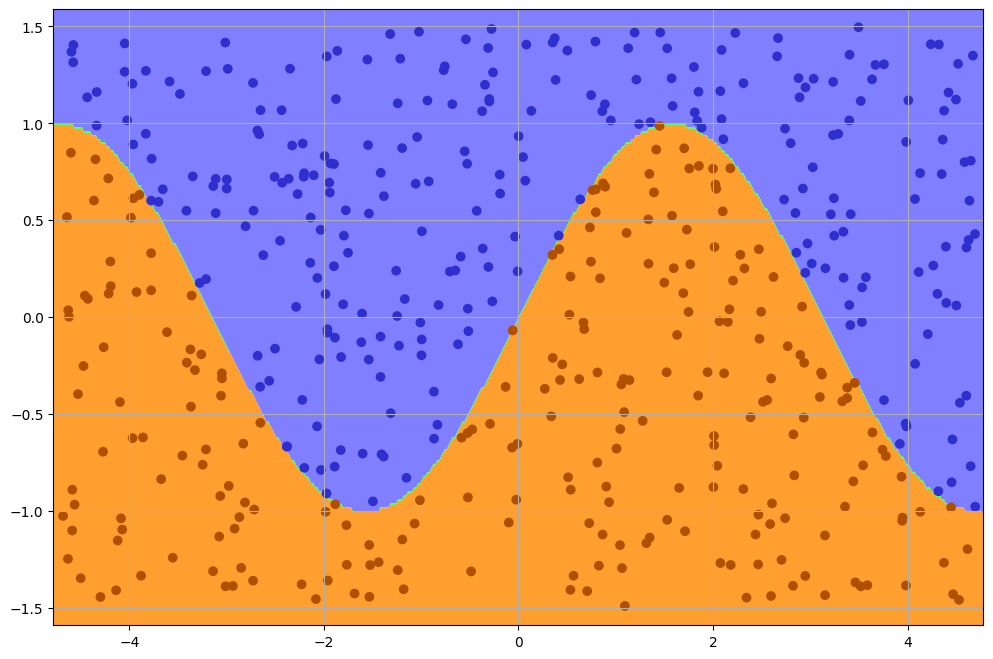

In [18]:
# create a meshgrid depending on data range
bordersize = .1
x_min, x_max = x.min() - bordersize, x.max() + bordersize
y_min, y_max = y.min() - bordersize, y.max() + bordersize

grid_size = .02
xrange = np.arange(x_min, x_max, grid_size)
yrange = np.arange(y_min, y_max, grid_size)
print(f"{xrange.shape=}, {yrange.shape=}")

xx, yy = np.meshgrid(xrange, yrange)
print(f"{xx.shape=}, {yy.shape=}")

# now xx maps from pixel position i, j to position x in the data

# classify each point in the meshgrid
zz = (yy > np.sin(xx)).astype(float)

# plot the contour of the true class distribution and the samples
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, zz, cmap=cmap_light)
plt.scatter(data[:, 0], data[:, 1], c=classes, cmap=cmap_bold)
plt.grid()
plt.show()

### Handling data shapes

The sklearn predictor expects input of shape `(datapoints, features)`. To input your meshgrid, use `np.reshape` to flatten both `xx` and `yy` and then use `np.stack` to stack them in the last axis. Finally `reshape` the predictor's output back to your meshgrid shape and you can plot the contour.


### Inplace modification in numpy

Be mindful of whether you are working with *copies* or *views* of your data.

Comparison of copying and inplace modification in numpy:


In [16]:
print(f"---------- Numpy ----------")
a = np.array([5])
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = np.array([5])
b = a
b -= 1
print(f"Inplace: {a} {b}")

print(f"---------- Python ----------")
a = 5
b = a
b = b - 1
print(f"Copy:    {a} {b}")

a = 5
b = a 
b -= 1
print(f"Inplace: {a} {b}")


---------- Numpy ----------
Copy:    [5] [4]
Inplace: [4] [4]
---------- Python ----------
Copy:    5 4
Inplace: 5 4
